In [33]:
import numpy as np
import pandas as pd

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
df=pd.read_csv('Fertilizer Prediction.csv')
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [36]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [38]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [39]:
print(df.nunique())

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64


In [40]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [71]:
y=df['Fertilizer Name']
X=df.drop('Fertilizer Name',axis=1)
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19
95,30,60,27,Red,Tobacco,4,17,17
96,38,72,51,Loamy,Wheat,39,0,0
97,36,60,43,Sandy,Millets,15,0,41


In [78]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7, shuffle=True, random_state=14)
X_train

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
23,28,54,37,Black,Millets,36,0,0
78,26,52,36,Clayey,Pulses,7,16,20
58,25,50,56,Loamy,Sugarcane,11,13,15
53,30,60,47,Sandy,Barley,12,0,42
47,29,58,43,Clayey,Paddy,24,0,18
...,...,...,...,...,...,...,...,...
28,37,70,32,Black,Oil seeds,12,0,39
71,31,62,32,Red,Tobacco,39,0,0
22,35,68,33,Red,Tobacco,11,0,37
12,25,50,65,Loamy,Cotton,36,0,0


In [79]:
X.shape[0]

99

In [80]:
y.shape[0]

99

In [81]:
#one hot encoding for categorical datas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
onehotencoding=ColumnTransformer(transformers= [
            ("onehotencoding", OneHotEncoder(sparse=False),["Soil Type","Crop Type"])],remainder="passthrough")


model = Pipeline(steps=[
              ("onehotencoding",onehotencoding),
              ("scaler", StandardScaler()),
              ("classifier", RandomForestClassifier())  
])

In [82]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(sparse=False),
                                                  ['Soil Type',
                                                   'Crop Type'])])),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [83]:
model.score(X_test, y_test)*100

93.33333333333333

In [84]:
y_pred=model.predict(X_test)
y_pred

array(['20-20', 'DAP', 'Urea', 'DAP', '28-28', '28-28', 'Urea', 'DAP',
       '14-35-14', 'DAP', '14-35-14', 'DAP', 'Urea', 'Urea', 'Urea',
       '20-20', 'Urea', '28-28', '20-20', '20-20', '28-28', 'Urea',
       '17-17-17', '20-20', '28-28', '20-20', 'Urea', 'DAP', '14-35-14',
       '28-28'], dtype=object)

In [94]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

    14-35-14       0.67      1.00      0.80         2
    17-17-17       1.00      0.50      0.67         2
       20-20       1.00      0.86      0.92         7
       28-28       1.00      1.00      1.00         6
         DAP       0.83      1.00      0.91         5
        Urea       1.00      1.00      1.00         8

    accuracy                           0.93        30
   macro avg       0.92      0.89      0.88        30
weighted avg       0.95      0.93      0.93        30



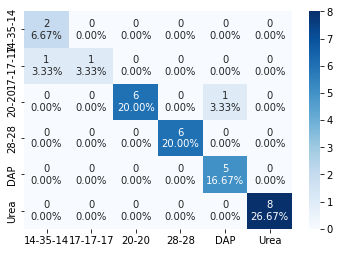

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

#group_names = ['True Neg','False Pos','False Neg','True Pos',]

group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['14-35-14','17-17-17', '20-20', '28-28', 'DAP', 'Urea'])
ax.yaxis.set_ticklabels(['14-35-14','17-17-17', '20-20', '28-28', 'DAP', 'Urea'])

## Display the visualization of the Confusion Matrix.
plt.show()

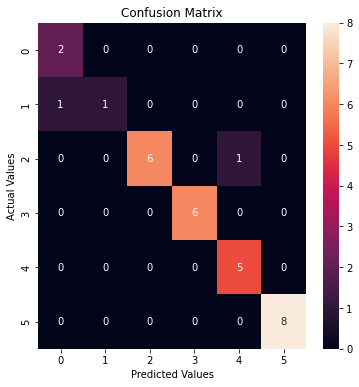

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()    